# Plot temporal Theil scaling

In [1]:
import os
import re
import sys
import json
import warnings
import matplotlib
import subprocess
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import matplotlib.colors as mcolors
import matplotlib.transforms as mtransforms

from scipy.optimize import curve_fit
from scipy.stats import percentileofscore

sys.path.append('../modules')
import plot_temporal_theil_scaling as plt_tts

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

colors = ["blue", "green", "red", "purple", "orange", "brown", "pink", "olive", "gray", "cyan"]

In [2]:
%matplotlib inline

## Global variables

In [3]:
input_path_raw = "../input_files/raw_data"
input_path_processed = "../input_files/processed_data"
input_path_data_dictionary = "../input_files/data_dictionary"
log_path = "../logs"
output_path = "../output_files"
input_generation_date = "2023-04-12"

In [4]:
list_time_series = {
    "^GSPC" : "Standard and Poor's 500", # S&P 500 (United States)
    "^GDAXI" : "German Stock index", # DAX Performance index (Germany)
    "^FCHI" : "Continuous Assisted Quotation 40", # CAC 40 (France)
    "^IXIC" : "National Association of Securities Dealers Automated Quotation Composite", # NASDAQ Composite (United States)
    "IMOEX.ME" : "Moscow Stock Exchange", # MOEX Russia Index (Russia)
    "^N225" : "Nikkei Heikin Kabuka Stock Exchange 225", # Nikkei 225 (Japan)
    "^BVSP" : "Sao Paulo Stock Exchange", # IBOVESPA (Brazil)
    "GBPUSD=X" : "Currency exchange rate from U.K. pound sterling to U.S. dollar", # GBP/USD
    "EURUSD=X" : "Currency exchange rate from euro to U.S. dollar", # EUR/USD
    "JPY=X" : "Currency exchange rate from U.S. dollar to japanese yen", # USD/JPY    
    "COP=X" : "Currency exchange rate from U.S. dollar to colombian peso", # USD/COP
    "COVIDWLDC" : "COVID-19 cases in the world", # COVID-19 Cases
    "COVIDWLDD" : "COVID-19 deaths in the world", # Covid-19 Deaths
    "PRCPBOG" : "Precipitation in Bogota (inches)", # Precipitation in Bogota
    "TEMPAVGBOG" : "Average temperature in Bogota (Fahrenheit degrees)" # Temperature in Bogota
}

## Load time series

In [5]:
df_dtts_processed_data = pd.read_csv("{}/df_tts_data_final_{}.csv".format(input_path_processed, re.sub("-", "", input_generation_date)), low_memory = False)
df_dtts_adjustments = pd.read_csv("{}/df_tts_final_{}.csv".format(input_path_processed, re.sub("-", "", input_generation_date)), low_memory = False)

In [6]:
if os.path.exists("{}/{}".format(output_path, re.sub("-", "", input_generation_date))) == False:
    os.mkdir("{}/{}".format(output_path, re.sub("-", "", input_generation_date)))

In [7]:
df_dtts_final = df_dtts_processed_data.merge(right = df_dtts_adjustments, left_on = ["time_series", "sub_time_series"], right_on =  ["time_series", "sub_time_series"])
df_dtts_final

,time_series,sub_time_series,index,mean_value,theil_index,norm_sum_theil_index,norm_prod_theil_index,tts_coefficient,tts_exponent,tts_coefficient_error,tts_exponent_error,rsquared
0,^GSPC,absolute log-return,23929,183.350611,5.894169e-12,0.693147,8.503488e-12,0.790868,0.205202,0.007415,0.001511,0.97382
1,^GSPC,absolute log-return,23928,183.345665,2.150681e-10,1.098612,1.957634e-10,0.790868,0.205202,0.007415,0.001511,0.97382
2,^GSPC,absolute log-return,23927,183.341006,3.247252e-10,1.386294,2.342397e-10,0.790868,0.205202,0.007415,0.001511,0.97382
3,^GSPC,absolute log-return,23926,183.335227,5.527904e-10,1.609438,3.434680e-10,0.790868,0.205202,0.007415,0.001511,0.97382
4,^GSPC,absolute log-return,23925,183.329517,7.030400e-10,1.791759,3.923741e-10,0.790868,0.205202,0.007415,0.001511,0.97382
...,...,...,...,...,...,...,...,...,...,...,...,...
22450,COVIDWLDD,volatility log-return,649,90.315591,4.184521e-03,6.202391,6.742077e-04,0.172894,0.215651,0.002120,0.001070,0.98794
22451,COVIDWLDD,volatility log-return,648,90.168692,4.203728e-03,6.204386,6.770825e-04,0.172894,0.215651,0.002120,0.001070,0.98794
22452,COVIDWLDD,volatility log-return,647,90.022227,4.223196e-03,6.206377,6.799980e-04,0.172894,0.215651,0.002120,0.001070,0.98794
22453,COVIDWLDD,volatility log-return,646,89.875694,4.242917e-03,6.208363,6.829528e-04,0.172894,0.215651,0.002120,0.001070,0.98794


Generated plot for ^GSPC and time series absolute log-return
Generated plot for ^GSPC and time series original
Generated plot for ^GSPC and time series volatility log-return


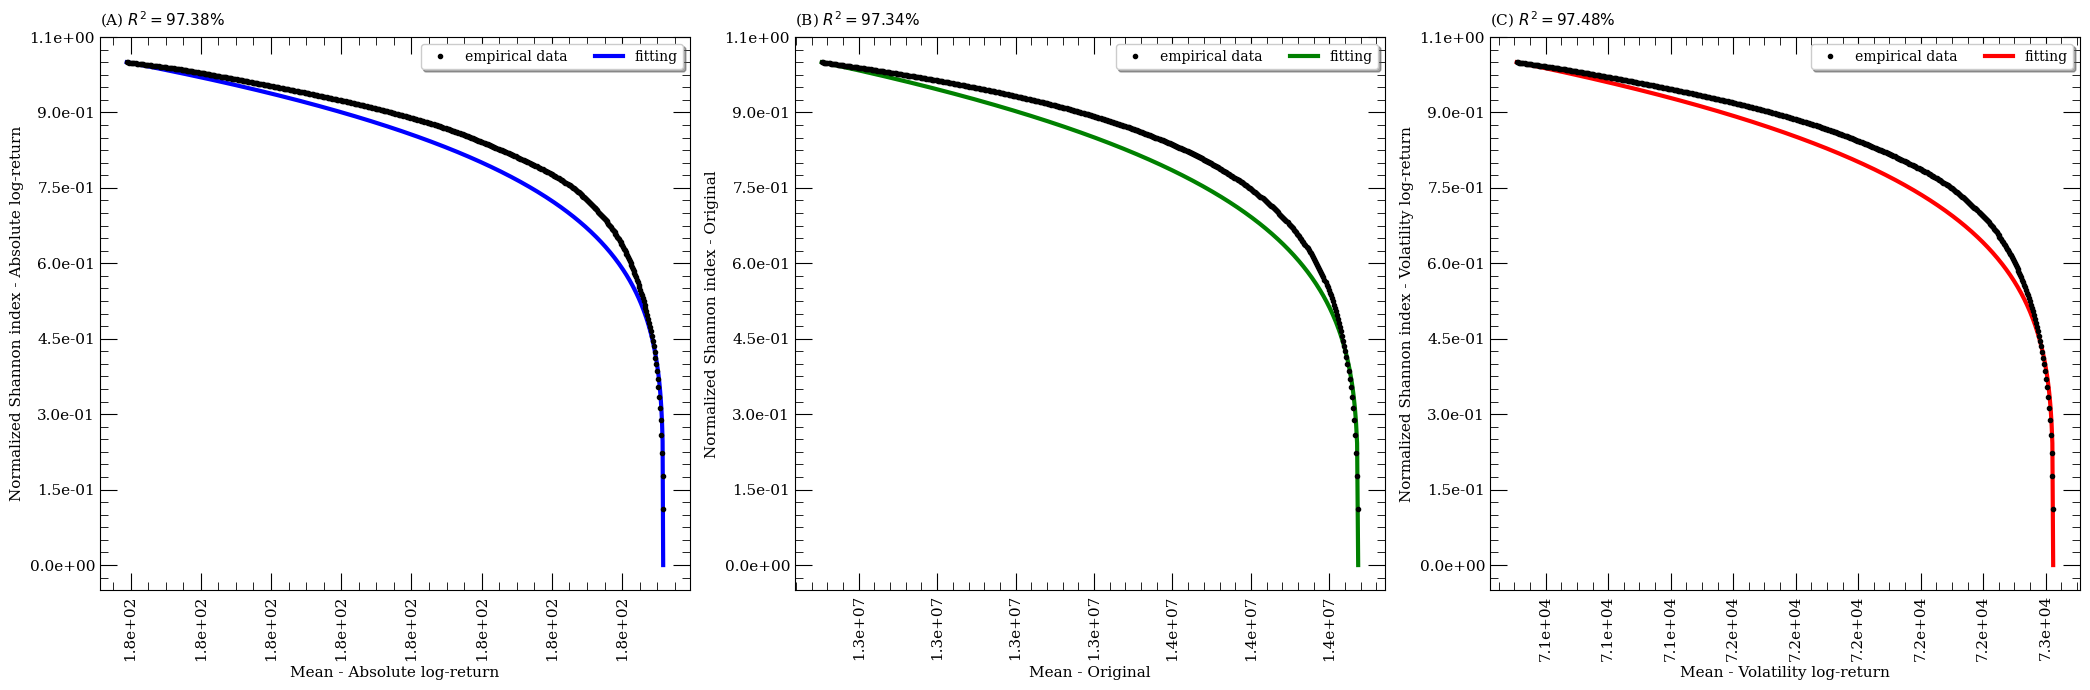

In [8]:
df_graph = plt_tts.plot_tts_evolution(
    df_tts = df_dtts_final,
    symbols = ["^GSPC"],
    width = 21,
    height = 7,
    markersize = 3,
    fontsize_labels = 11,
    fontsize_legend = 10,
    usetex = False,
    n_cols = 4,
    n_x_breaks = 10,
    n_y_breaks = 10,
    fancy_legend = True,
    dpi = 200,
    save_figures = True,
    output_path = "{}/{}".format(output_path, re.sub("-", "", input_generation_date)),
    information_name = re.sub("(\^)|(=X)", "", "^GSPC"),
    input_generation_date = input_generation_date
)

Generated plot for ^GSPC and time series absolute log-return
Generated plot for ^GSPC and time series original
Generated plot for ^GSPC and time series volatility log-return


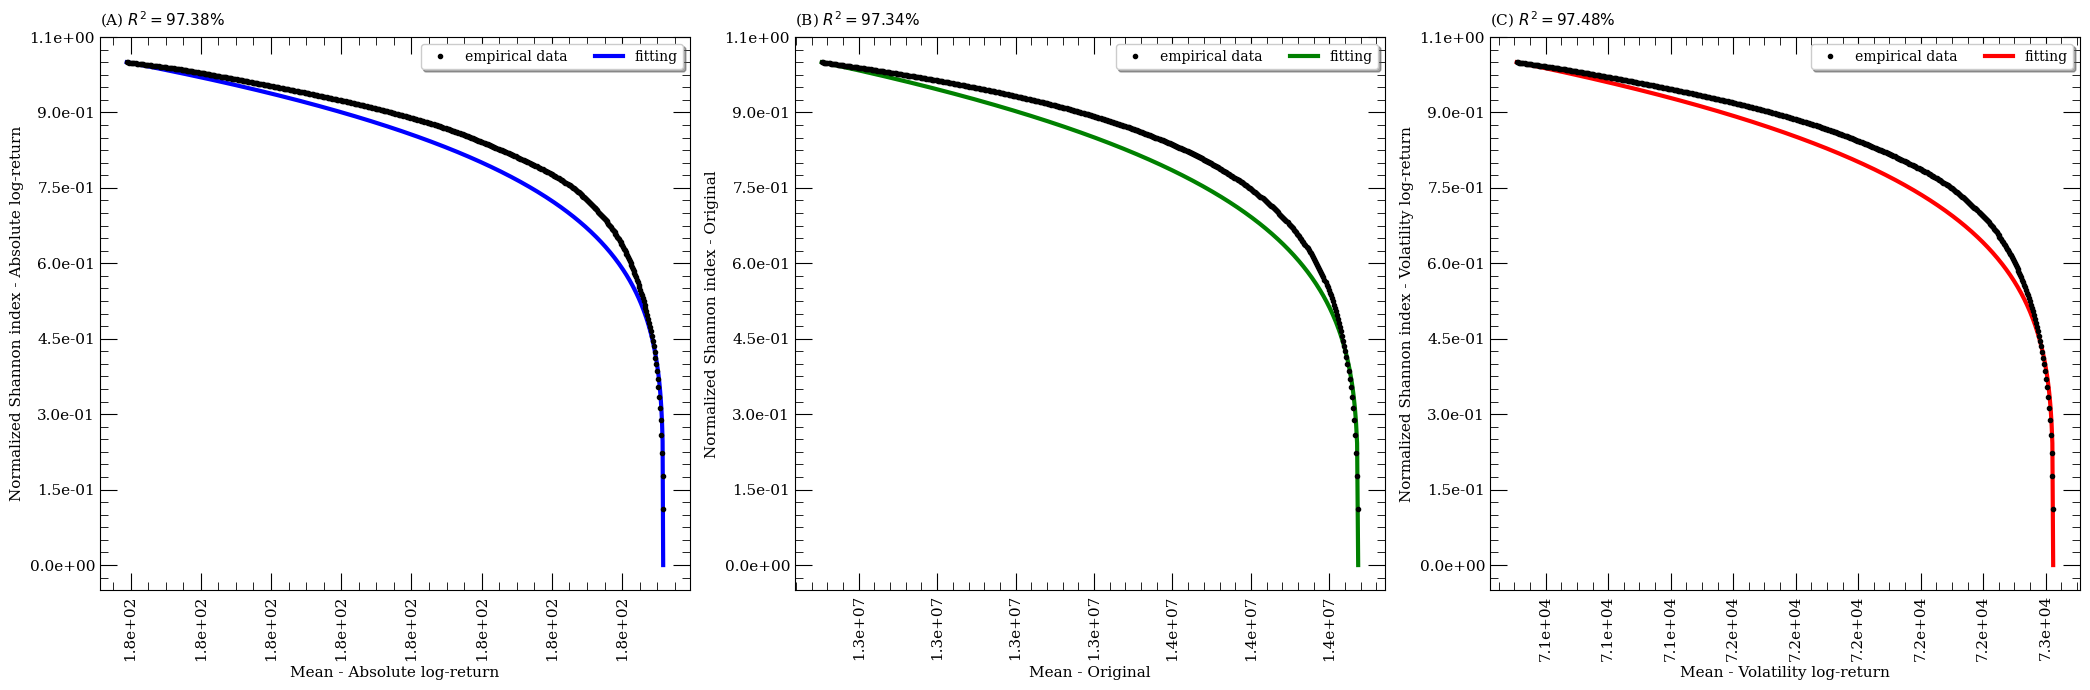

Generated plot for ^GDAXI and time series absolute log-return
Generated plot for ^GDAXI and time series original
Generated plot for ^GDAXI and time series volatility log-return


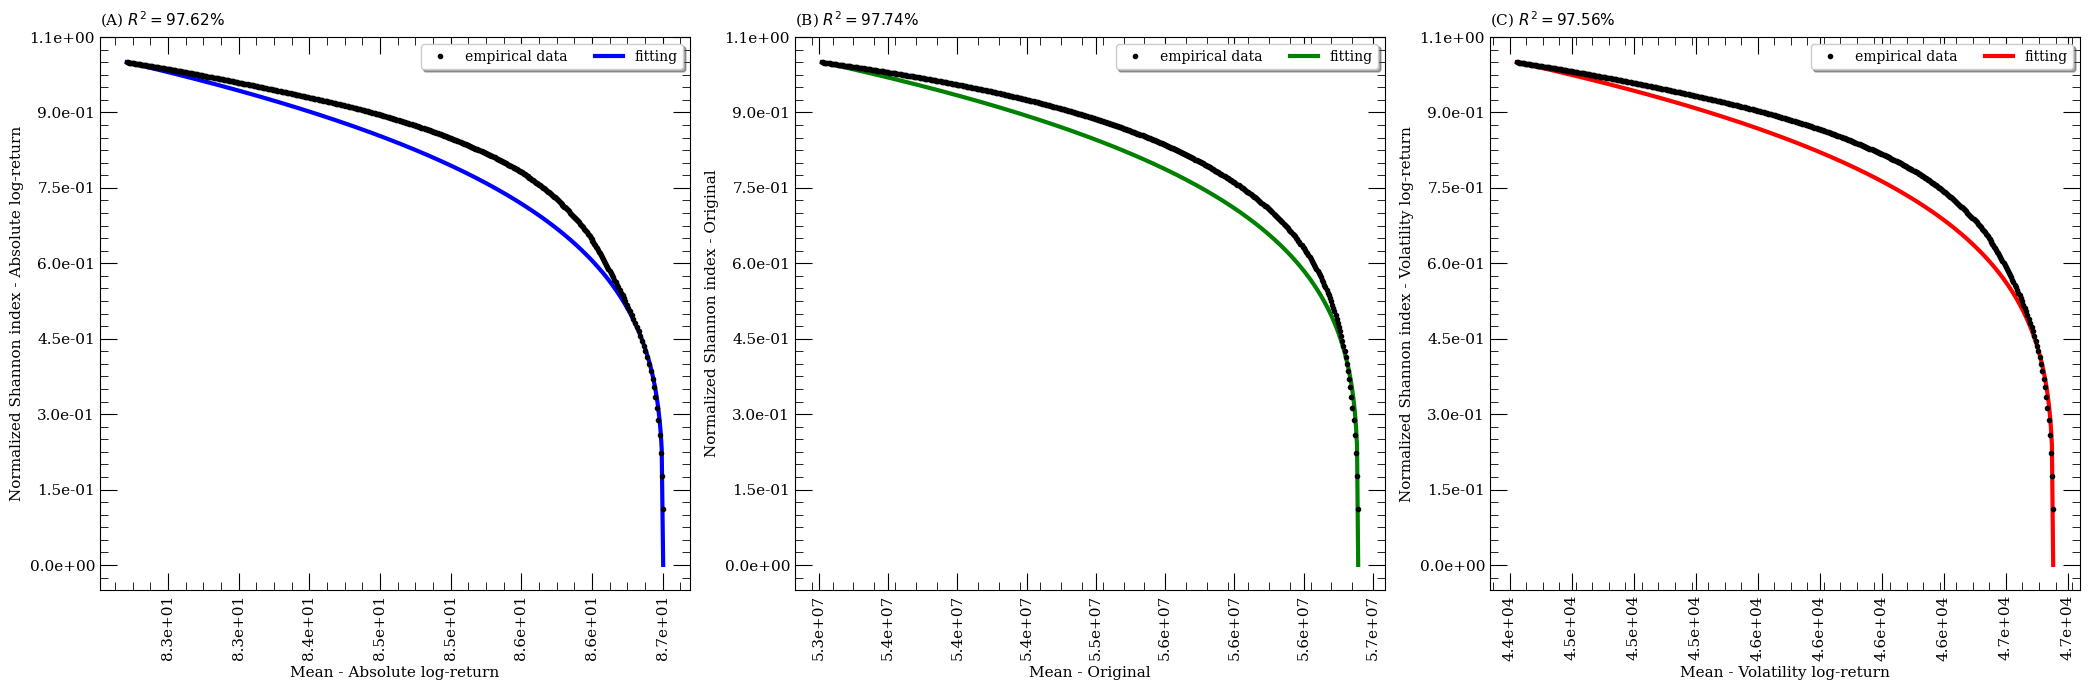

Generated plot for ^FCHI and time series absolute log-return
Generated plot for ^FCHI and time series original
Generated plot for ^FCHI and time series volatility log-return


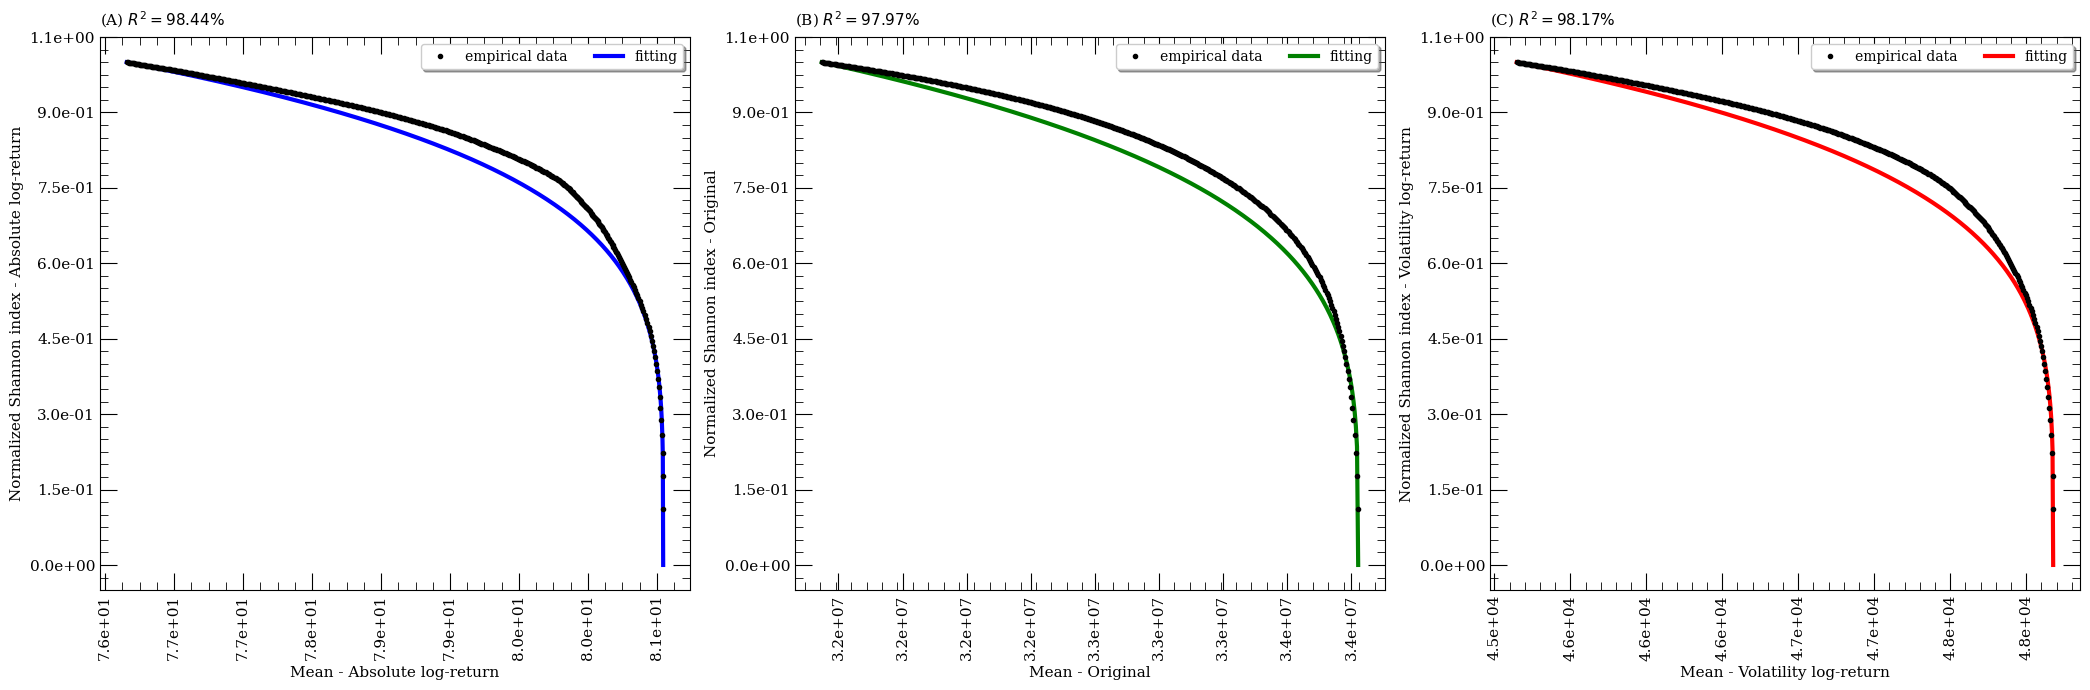

Generated plot for ^IXIC and time series absolute log-return
Generated plot for ^IXIC and time series original
Generated plot for ^IXIC and time series volatility log-return


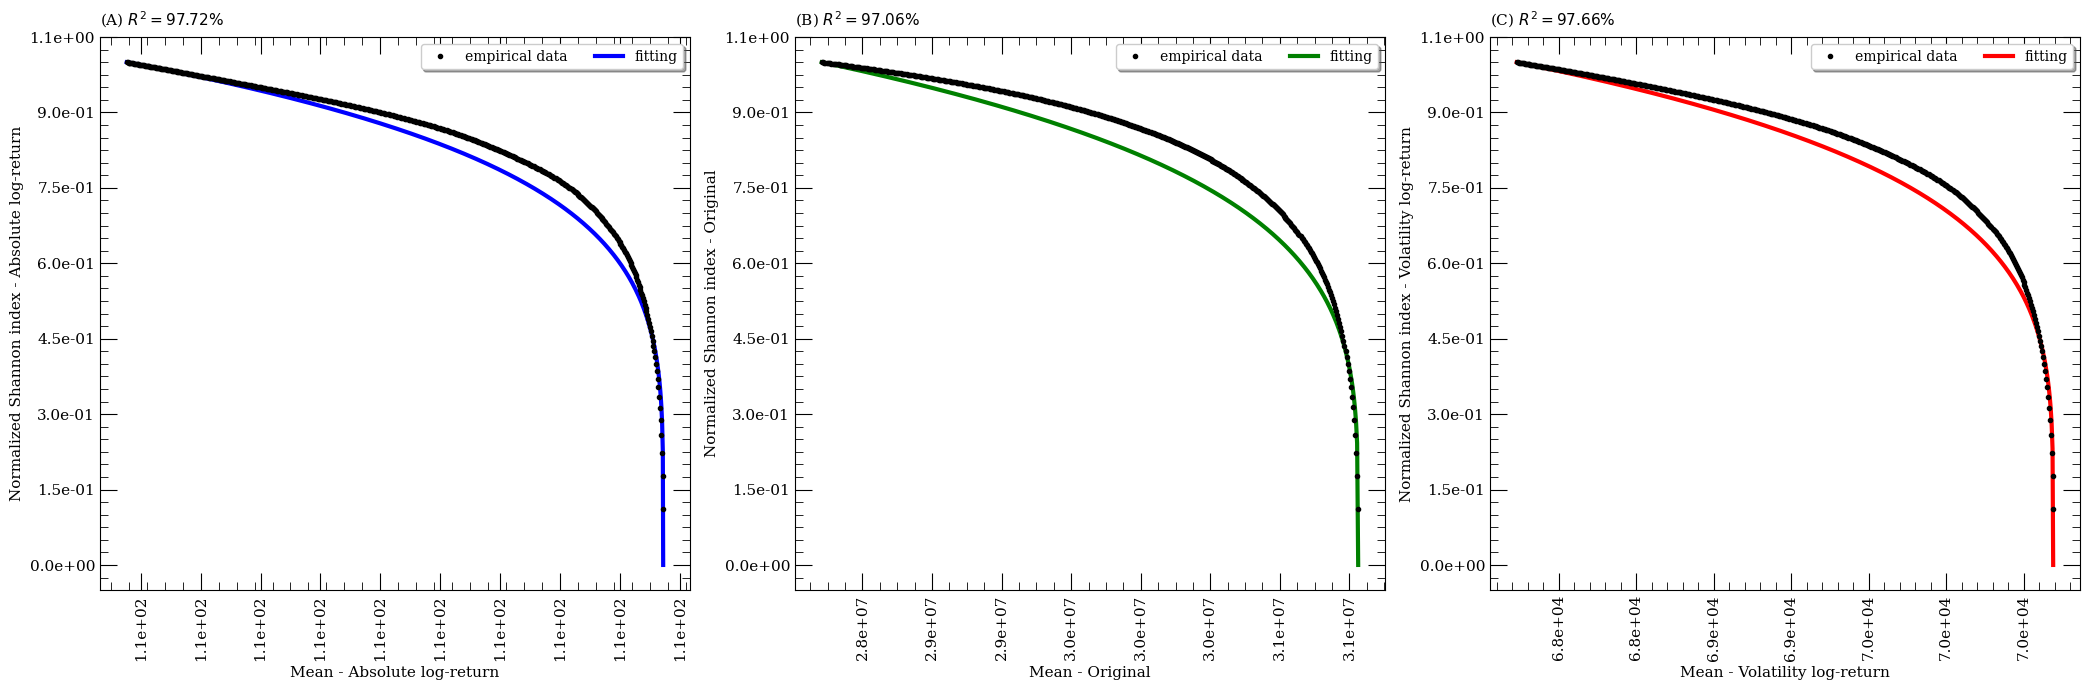

Generated plot for IMOEX.ME and time series absolute log-return
Generated plot for IMOEX.ME and time series original
Generated plot for IMOEX.ME and time series volatility log-return


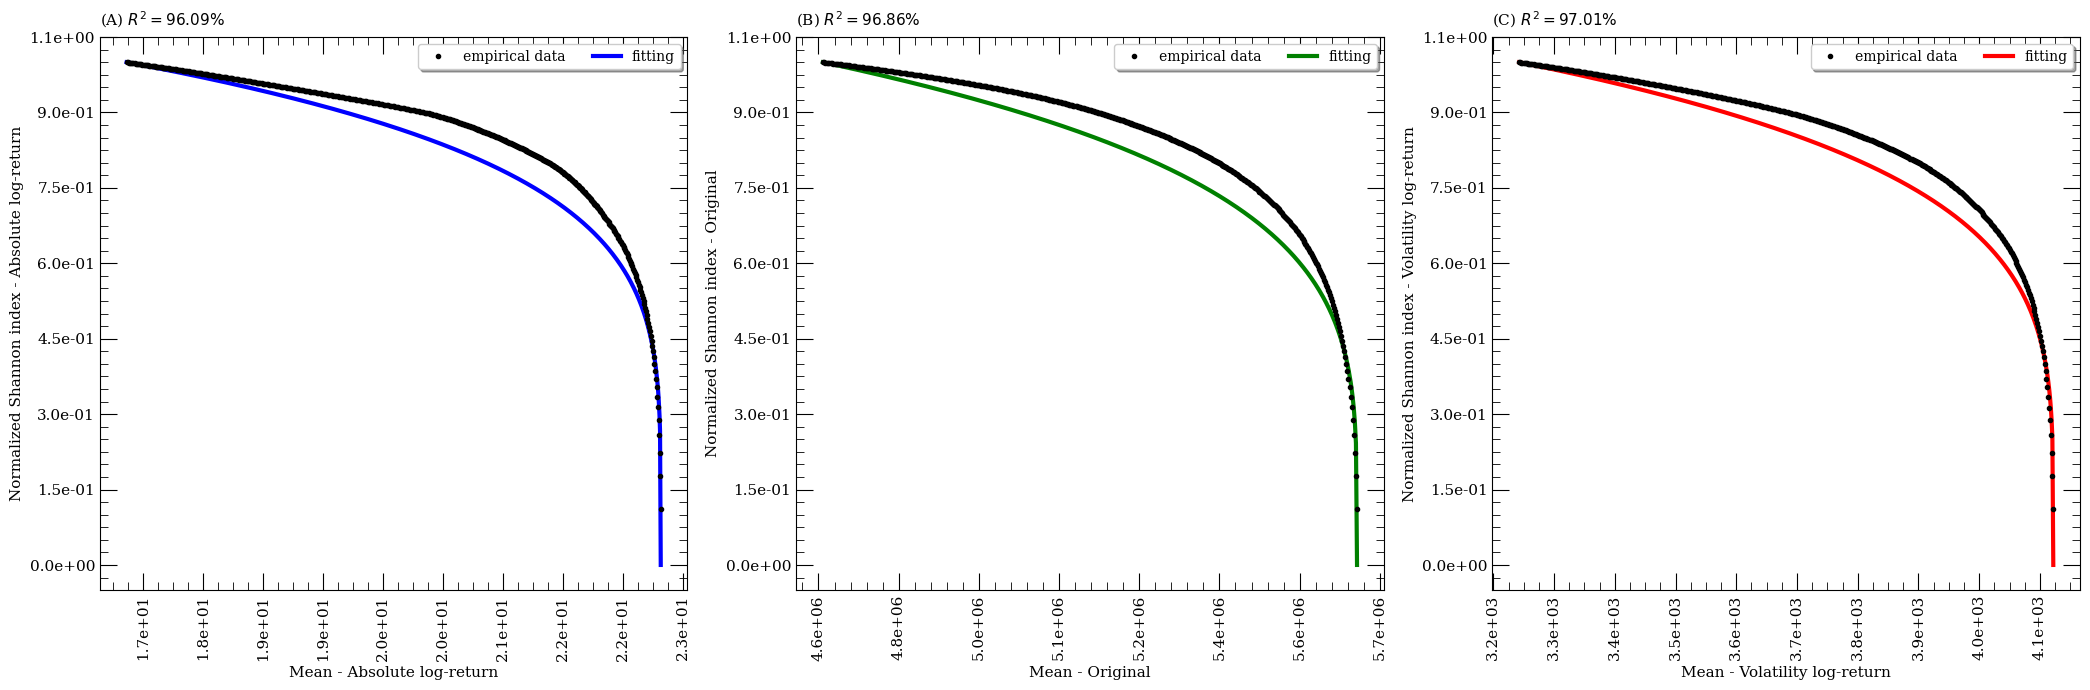

Generated plot for ^N225 and time series absolute log-return
Generated plot for ^N225 and time series original
Generated plot for ^N225 and time series volatility log-return


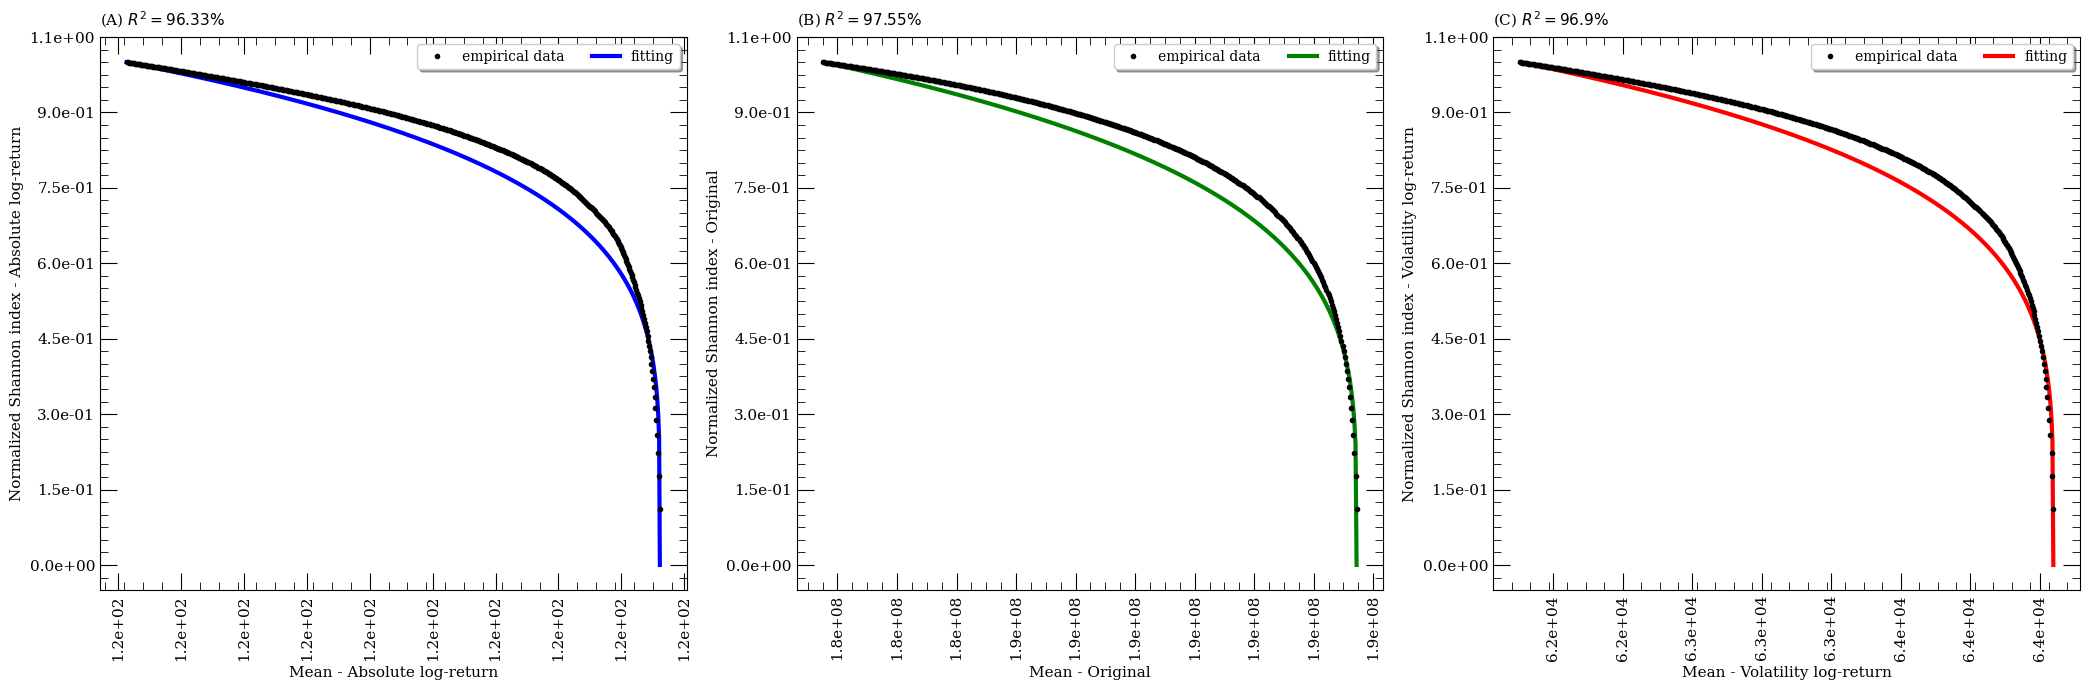

Generated plot for ^BVSP and time series absolute log-return
Generated plot for ^BVSP and time series original
Generated plot for ^BVSP and time series volatility log-return


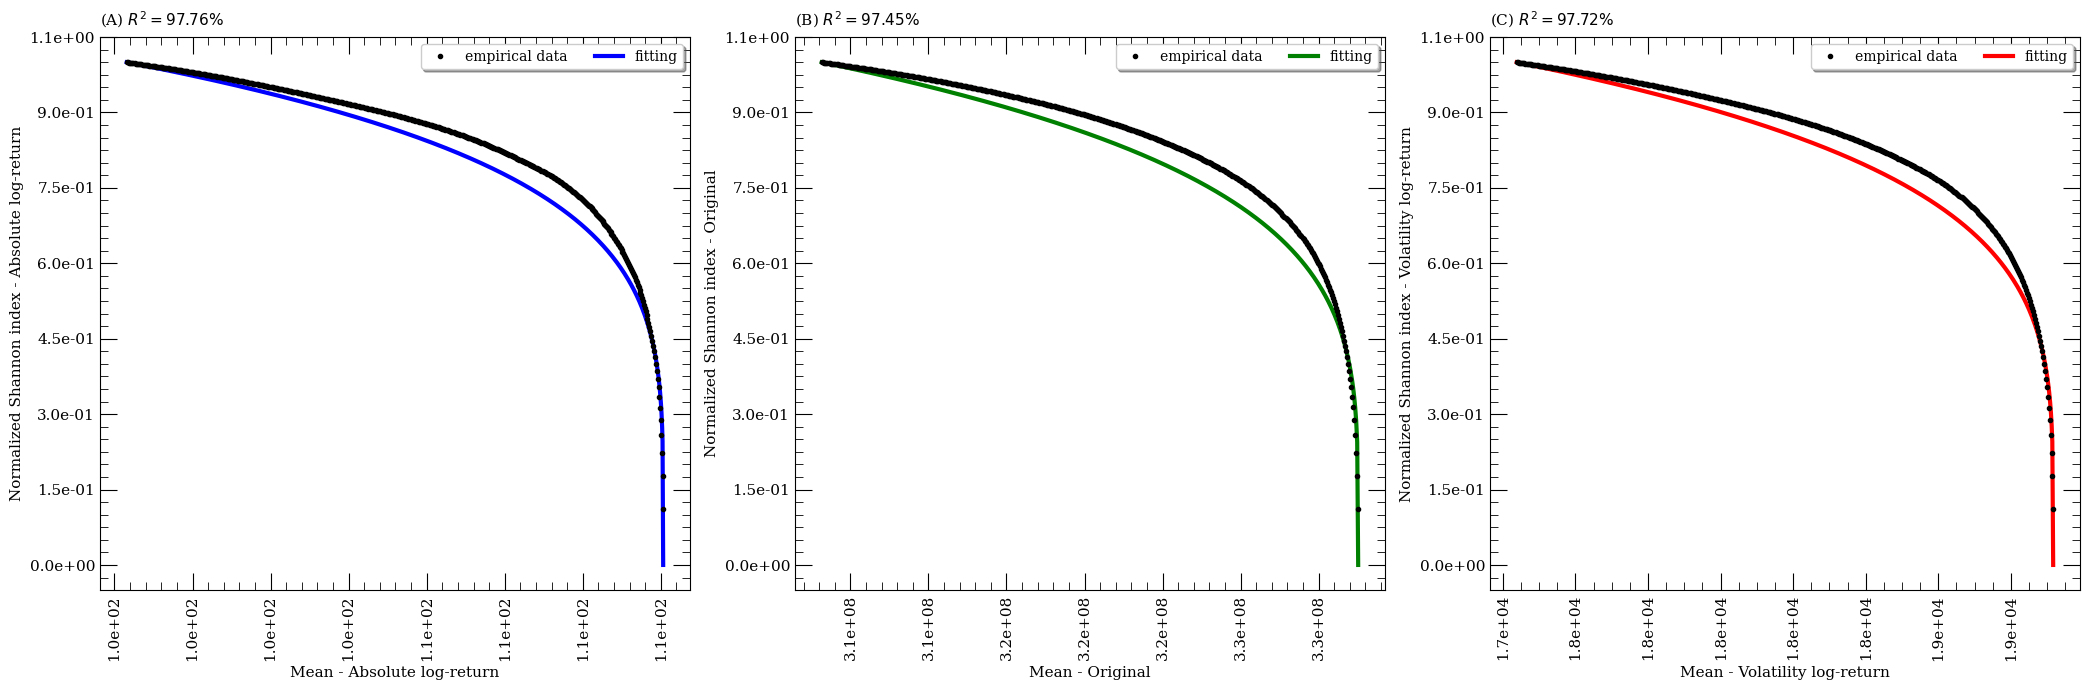

Generated plot for GBPUSD=X and time series absolute log-return
Generated plot for GBPUSD=X and time series original
Generated plot for GBPUSD=X and time series volatility log-return


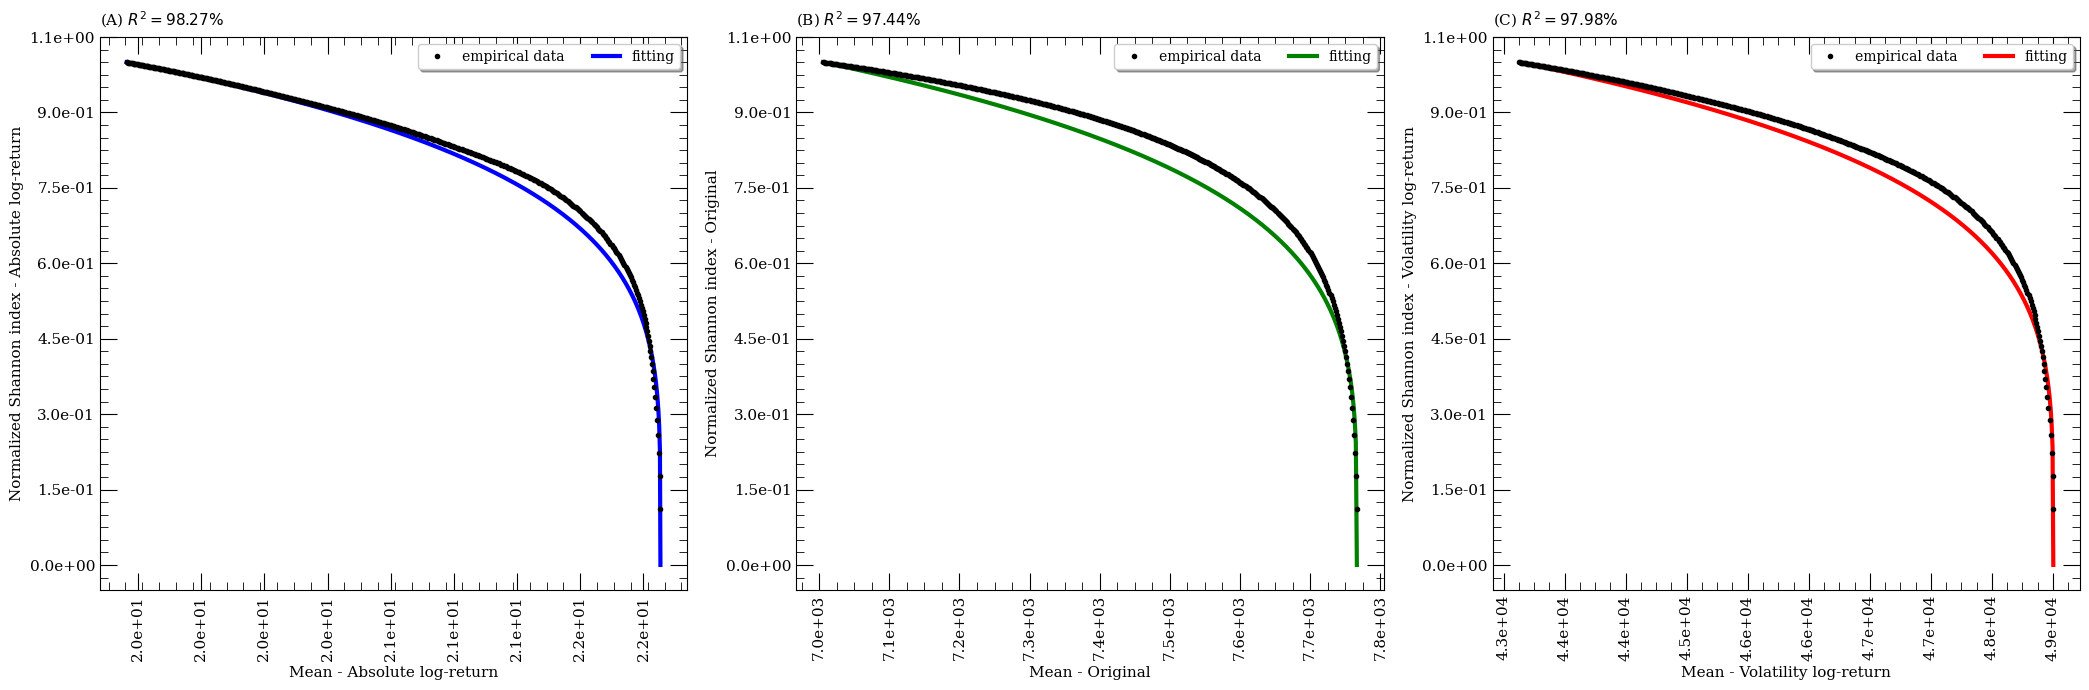

Generated plot for EURUSD=X and time series absolute log-return
Generated plot for EURUSD=X and time series original
Generated plot for EURUSD=X and time series volatility log-return


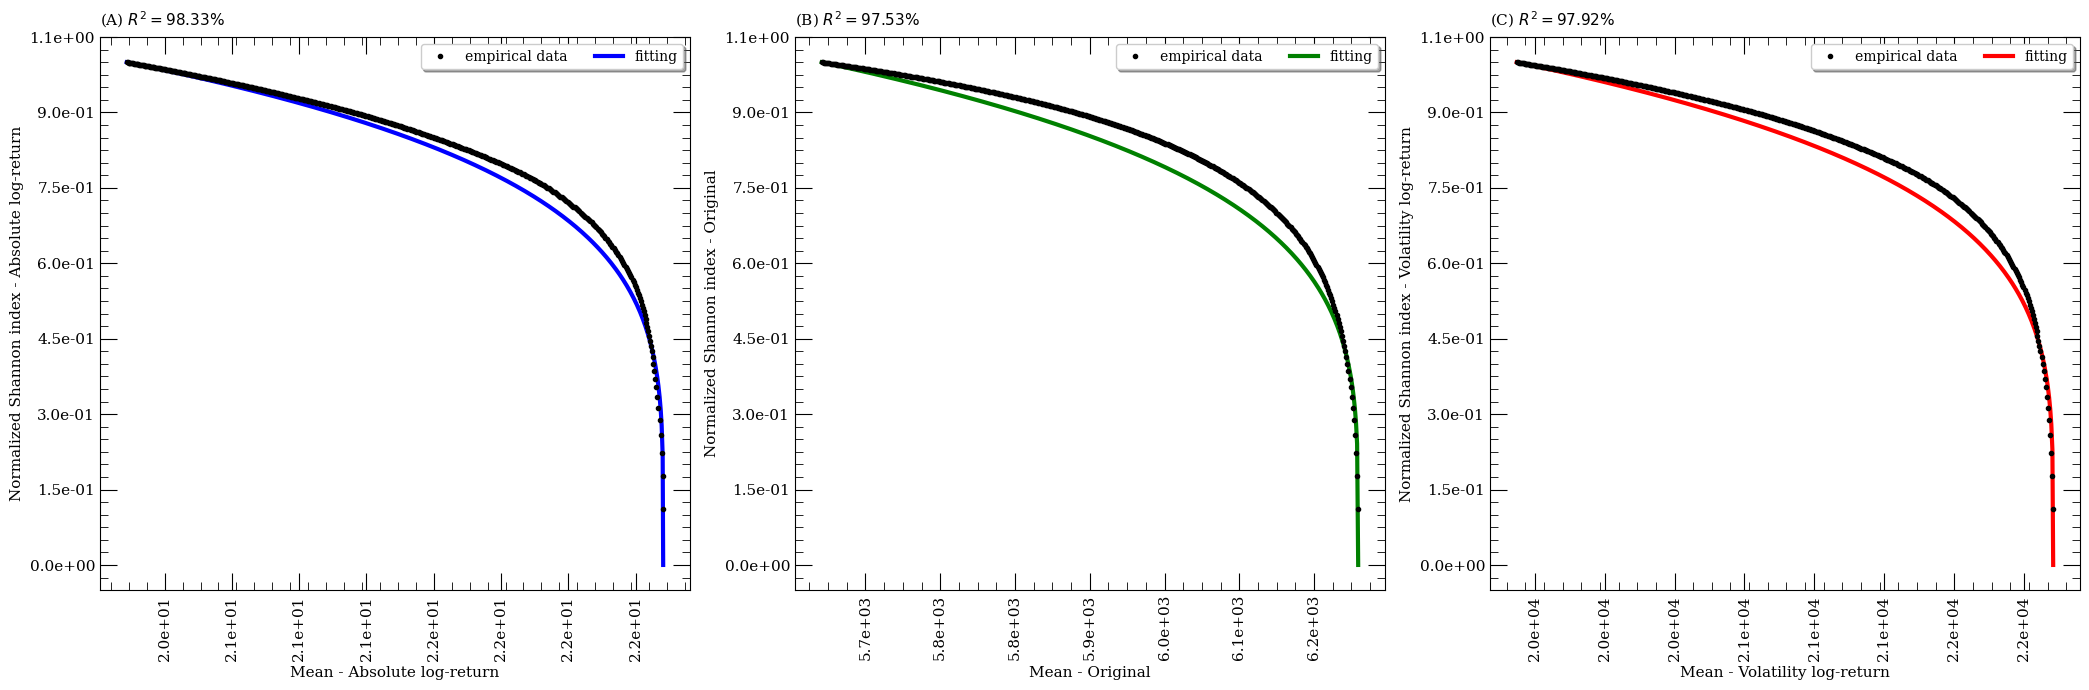

Generated plot for JPY=X and time series absolute log-return
Generated plot for JPY=X and time series original
Generated plot for JPY=X and time series volatility log-return


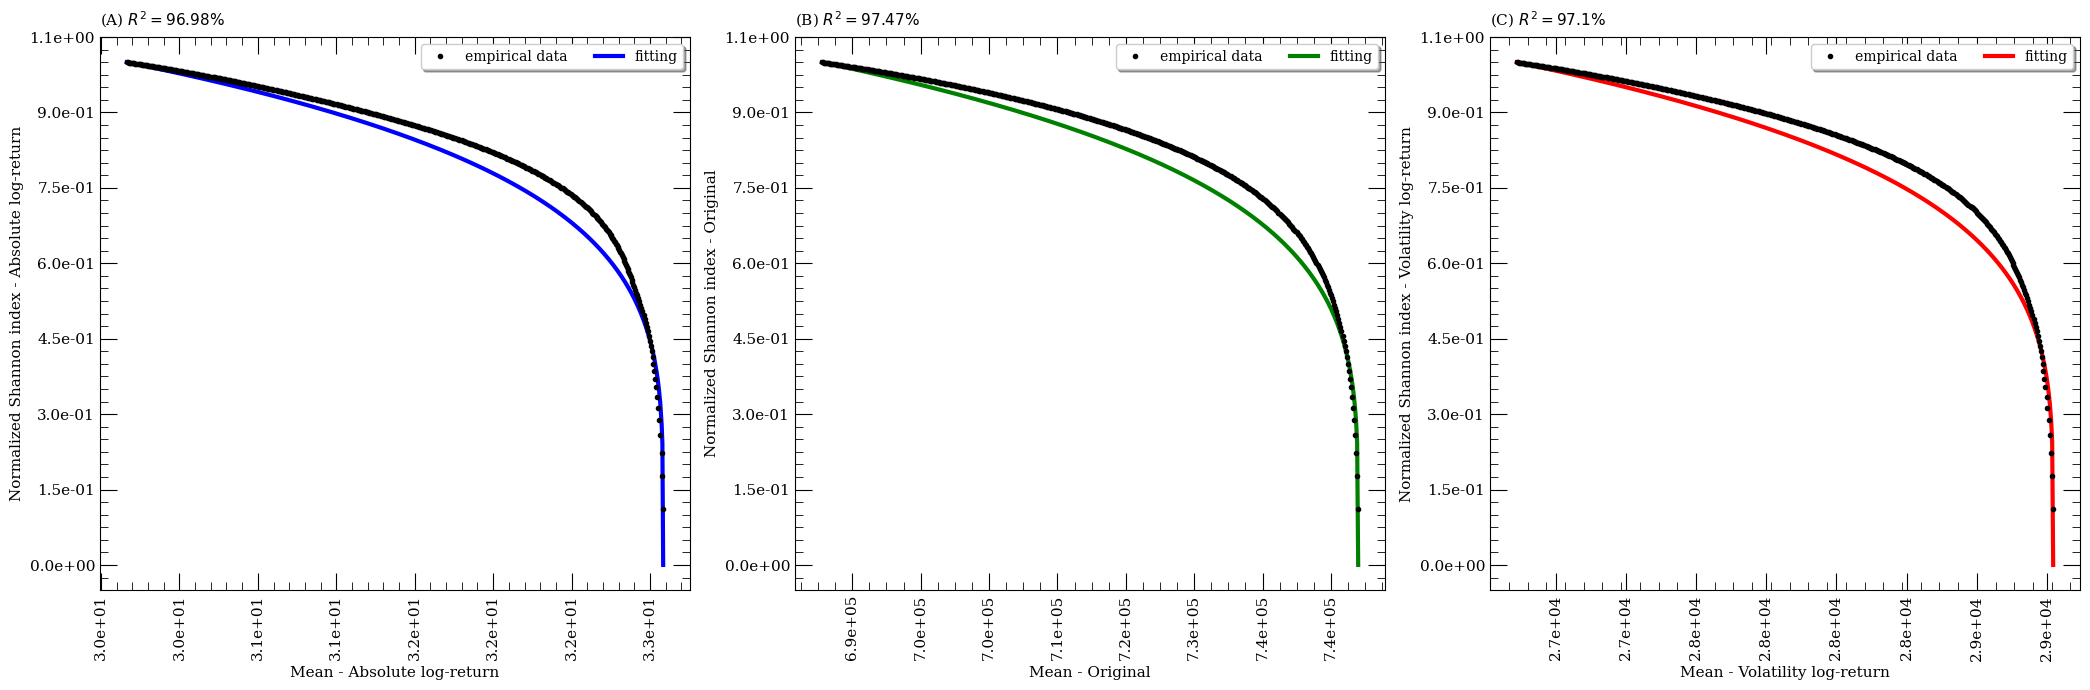

Generated plot for COP=X and time series absolute log-return
Generated plot for COP=X and time series original
Generated plot for COP=X and time series volatility log-return


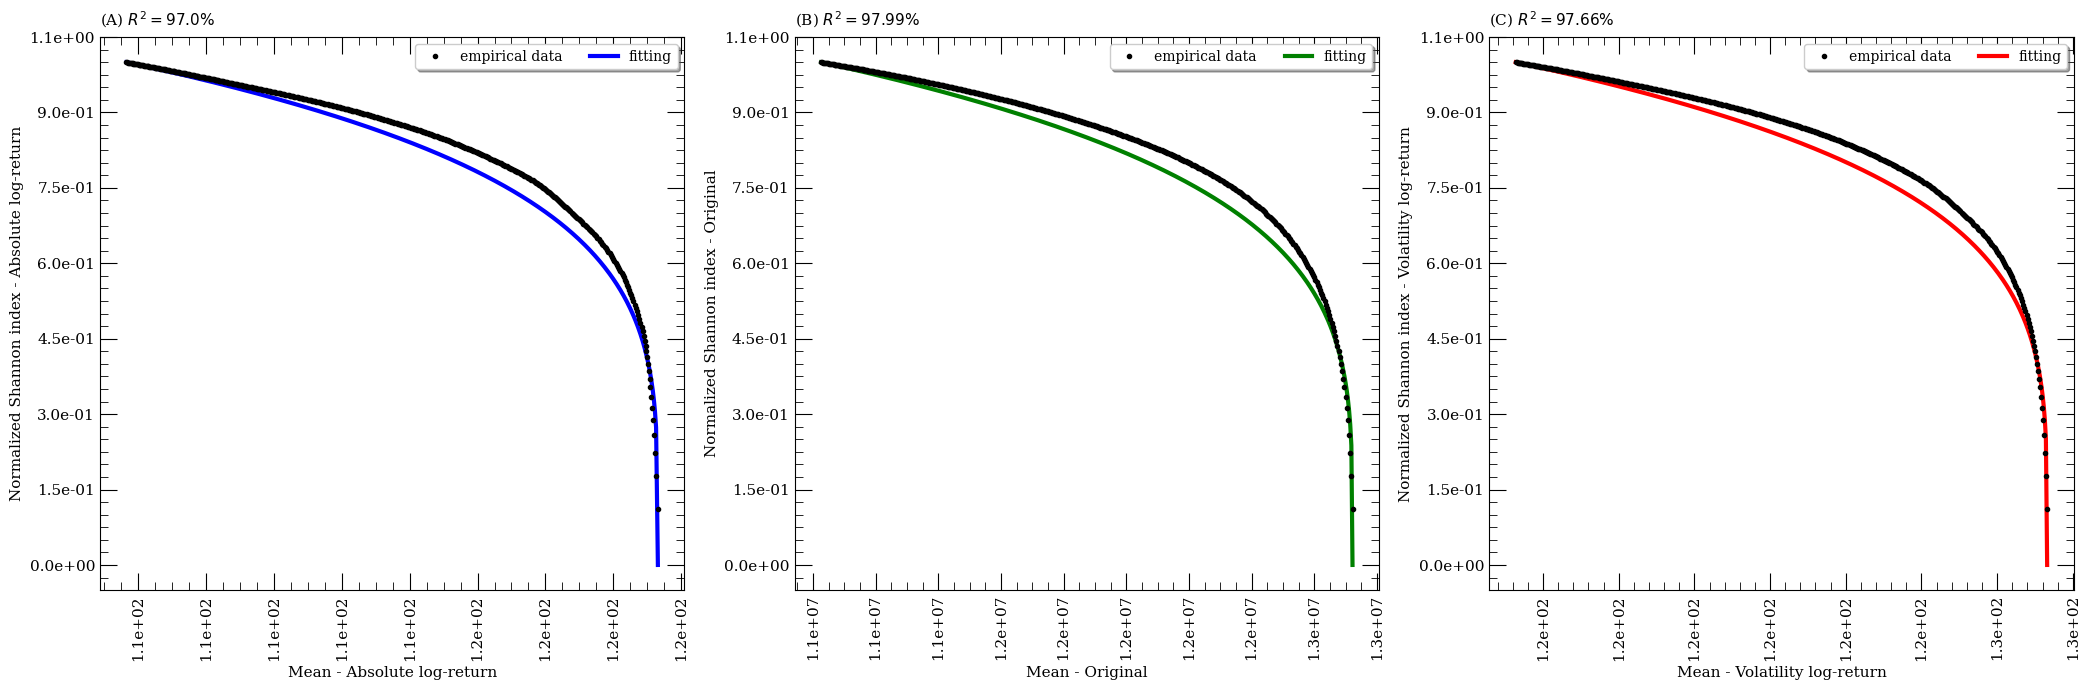

Generated plot for COVIDWLDC and time series absolute log-return
Generated plot for COVIDWLDC and time series original
Generated plot for COVIDWLDC and time series volatility log-return


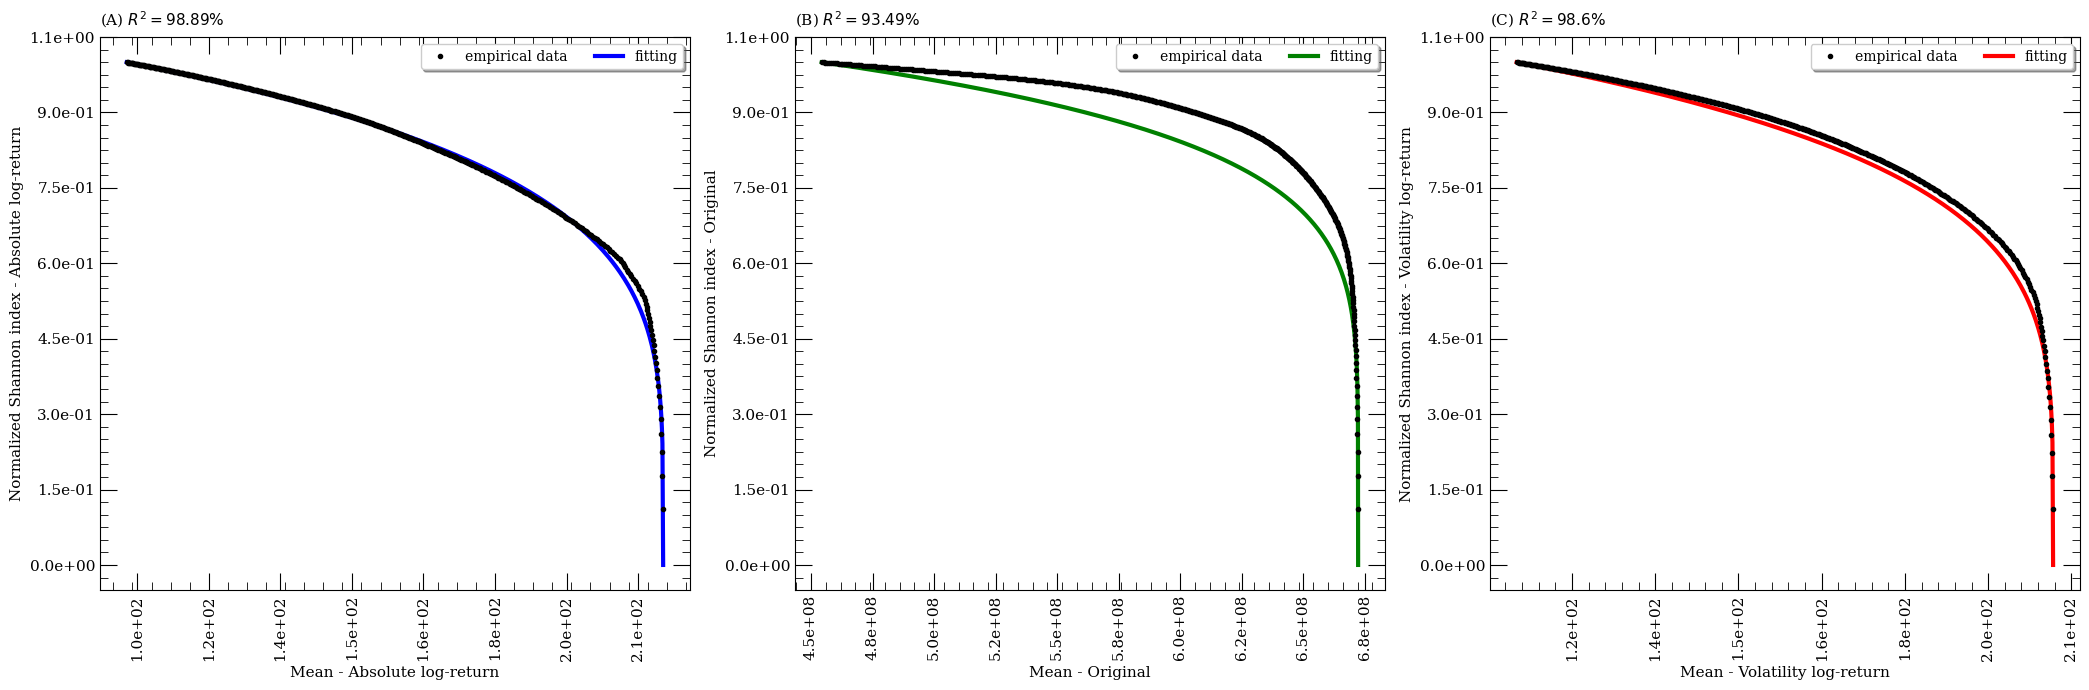

Generated plot for COVIDWLDD and time series absolute log-return
Generated plot for COVIDWLDD and time series original
Generated plot for COVIDWLDD and time series volatility log-return


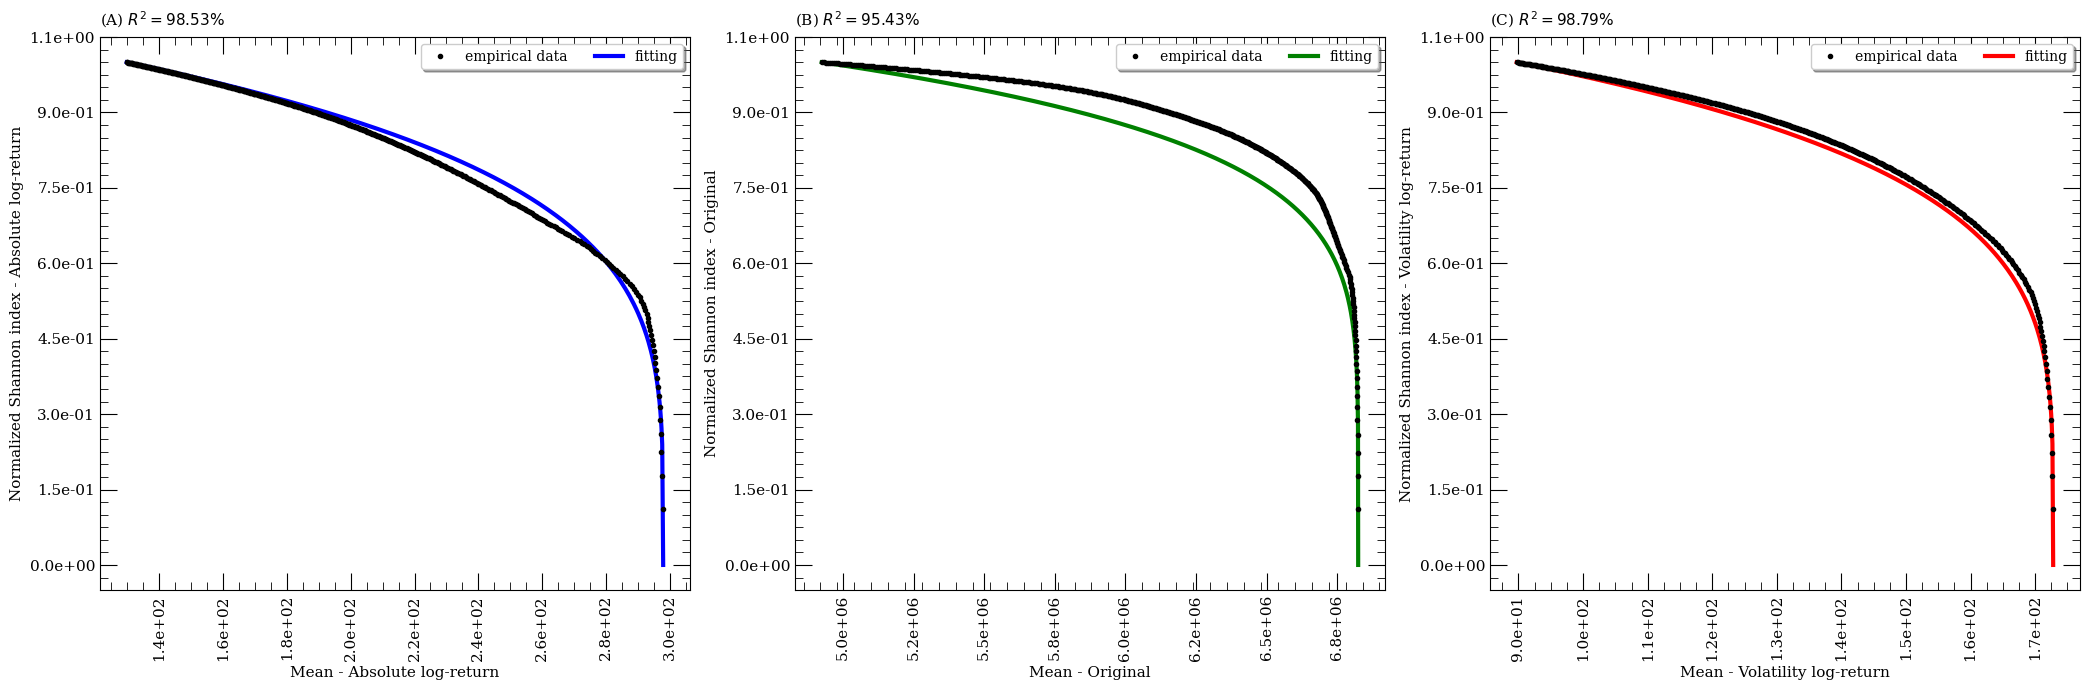

Generated plot for PRCPBOG and time series absolute log-return
Generated plot for PRCPBOG and time series original
Generated plot for PRCPBOG and time series volatility log-return


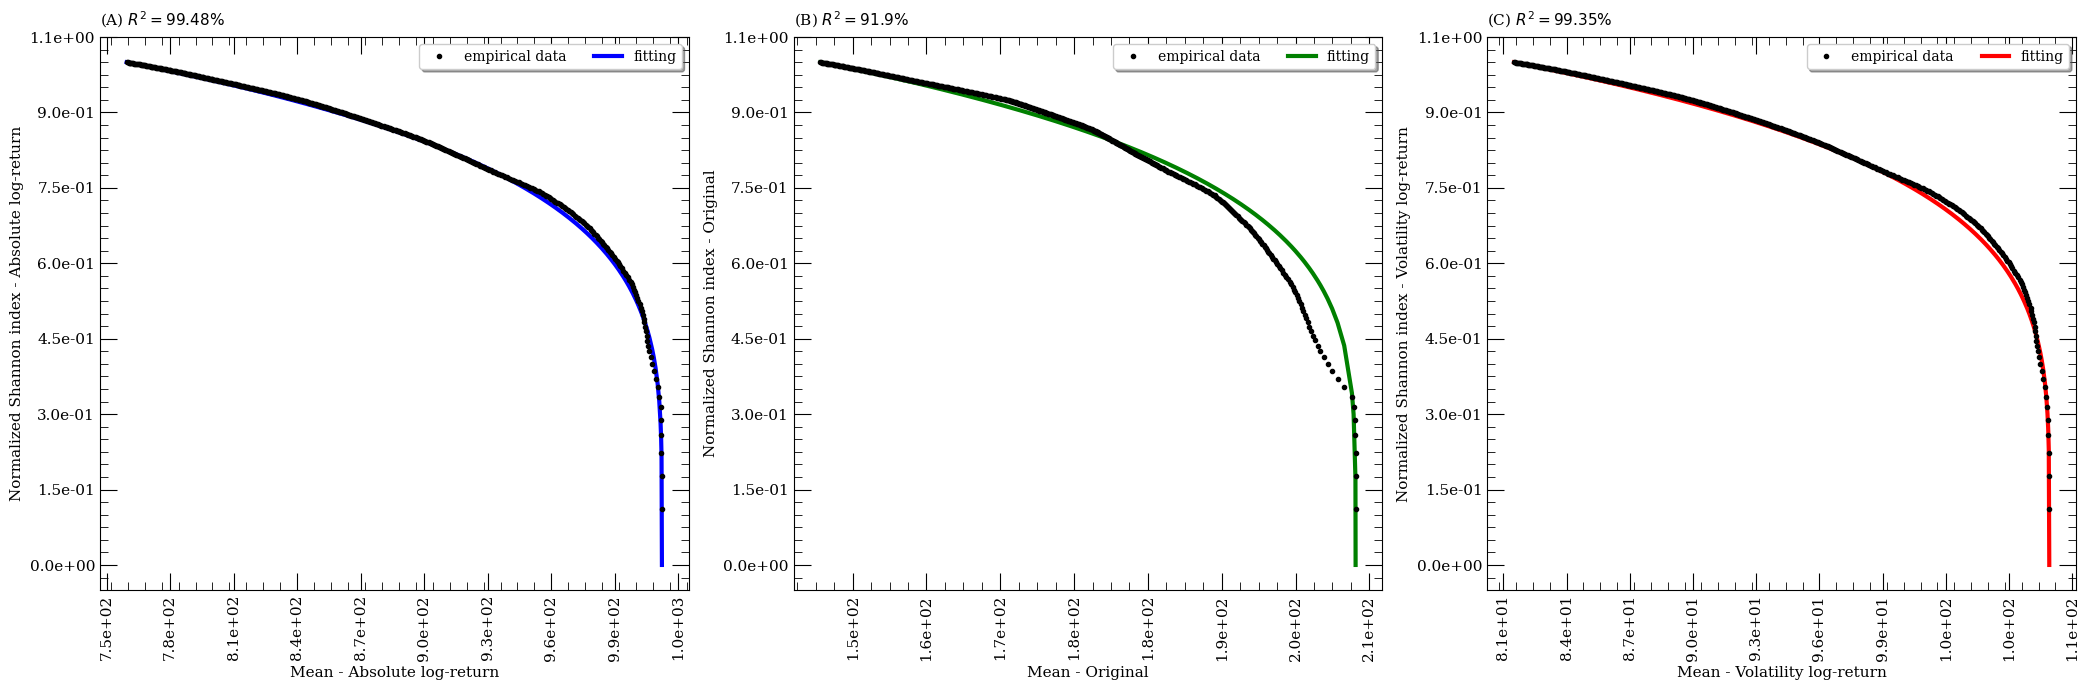

Generated plot for TEMPAVGBOG and time series absolute log-return
Generated plot for TEMPAVGBOG and time series original
Generated plot for TEMPAVGBOG and time series volatility log-return


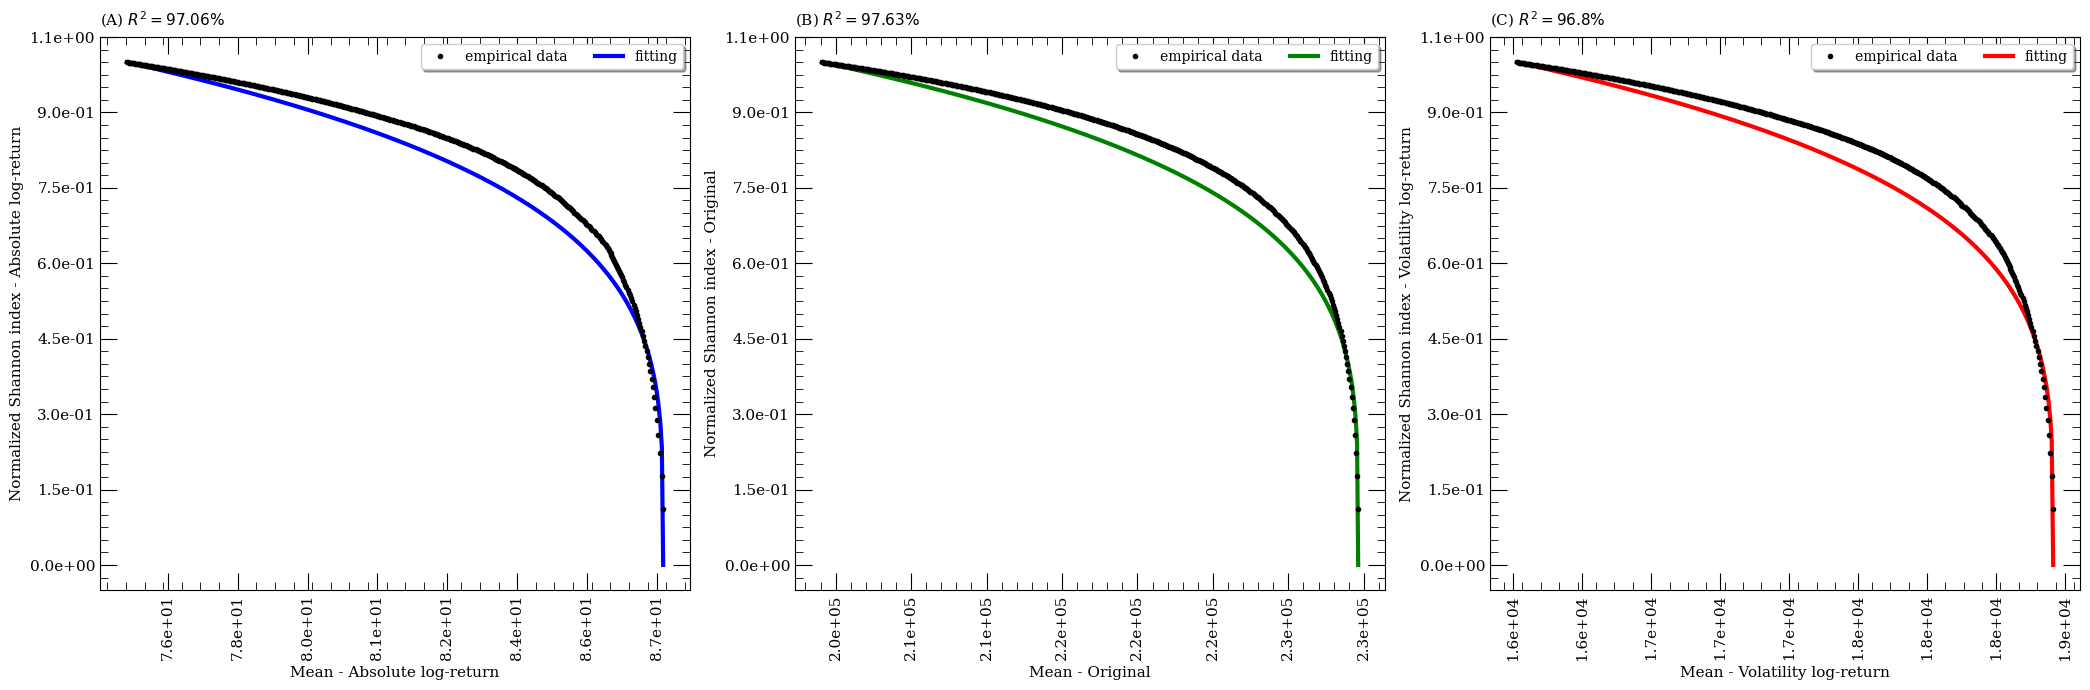

In [9]:
for ticker, ticker_name in list_time_series.items():
    df_graph = plt_tts.plot_tts_evolution(
        df_tts = df_dtts_final,
        symbols = [ticker],
        width = 21,
        height = 7,
        markersize = 3,
        fontsize_labels = 11,
        fontsize_legend = 10,
        usetex = False,
        n_cols = 4,
        n_x_breaks = 10,
        n_y_breaks = 10,
        fancy_legend = True,
        dpi = 200,
        save_figures = True,
        output_path = "{}/{}".format(output_path, re.sub("-", "", input_generation_date)),
        information_name = re.sub("(\^)|(=X)", "", ticker),
        input_generation_date = input_generation_date
    )
